In [1]:
# coding=utf-8
import torch.autograd
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
from torchvision import datasets
from torchvision.utils import save_image
import os
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 创建文件夹
if not os.path.exists('./img'):
    os.mkdir('./img')
 
 
def to_img(x):
    out = 0.5 * (x + 1)
    out = out.clamp(0, 1)  # Clamp函数可以将随机变化的数值限制在一个给定的区间[min, max]内：
    out = out.view(-1, 1, 28, 28)  # view()函数作用是将一个多行的Tensor,拼接成一行
    return out
 
 
batch_size = 128
num_epoch = 30
z_dimension = 100

In [2]:
# 图像预处理
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # (x-mean) / std
])
 
# mnist dataset mnist数据集下载
mnist = datasets.MNIST(
    root='D:\数据库\MNIST_data', train=True, transform=img_transform, download=True
)
 
# data loader 数据载入
dataloader = torch.utils.data.DataLoader(
    dataset=mnist, batch_size=batch_size, shuffle=True
)
 

In [3]:
# 定义判别器  #####Discriminator######使用多层网络来作为判别器
# 将图片28x28展开成784，然后通过多层感知器，中间经过斜率设置为0.2的LeakyReLU激活函数，
# 最后接sigmoid激活函数得到一个0到1之间的概率进行二分类。
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.dis = nn.Sequential(
            nn.Linear(784, 256),  # 输入特征数为784，输出为256
            nn.LeakyReLU(0.2),  # 进行非线性映射
            nn.Linear(256, 256),  # 进行一个线性映射
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # 也是一个激活函数，二分类问题中，
            # sigmoid可以班实数映射到【0,1】，作为概率值，
            # 多分类用softmax函数
        )
 
    def forward(self, x):
        x = self.dis(x)
        return x
 
 
# ###### 定义生成器 Generator #####
# 输入一个100维的0～1之间的高斯分布，然后通过第一层线性变换将其映射到256维,
# 然后通过LeakyReLU激活函数，接着进行一个线性变换，再经过一个LeakyReLU激活函数，
# 然后经过线性变换将其变成784维，最后经过Tanh激活函数是希望生成的假的图片数据分布
# 能够在-1～1之间。
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(100, 256),  # 用线性变换将输入映射到256维
            nn.ReLU(True),  # relu激活
            nn.Linear(256, 256),  # 线性变换
            nn.ReLU(True),  # relu激活
            nn.Linear(256, 784),  # 线性变换
            nn.Tanh()  # Tanh激活使得生成数据分布在【-1,1】之间，因为输入的真实数据的经过transforms之后也是这个分布
        )
 
    def forward(self, x):
        x = self.gen(x)
        return x
 
 
# 创建对象
D = discriminator()
G = generator()
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()
 
#print(D)
#print(G)

In [4]:
 # 首先需要定义loss的度量方式  （二分类的交叉熵）
# 其次定义 优化函数,优化函数的学习率为0.0003
criterion = nn.BCELoss()  # 是单目标二分类交叉熵函数
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0003)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0003)
 

In [5]:
def showimg(path):
    img = Image.open(path)
    plt.figure("Image") # 图像窗口名称
    plt.imshow(img)
    plt.axis('on') # 关掉坐标轴为 off
    #plt.title('image') # 图像题目
    plt.show()

D:\anconda\envs\pyenv\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Epoch[0/30],d_loss:0.168986,g_loss:3.644246 D real: 0.955452,D fake: 0.108521
Epoch[0/30],d_loss:0.041374,g_loss:4.564215 D real: 0.990587,D fake: 0.031243
Epoch[0/30],d_loss:0.346365,g_loss:4.891939 D real: 0.914208,D fake: 0.192381
Epoch[0/30],d_loss:0.094179,g_loss:6.132777 D real: 0.973271,D fake: 0.057733


D:\anconda\envs\pyenv\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([96])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


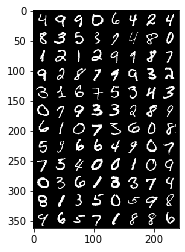

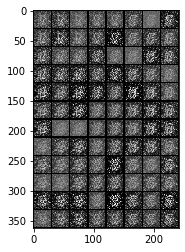

Epoch[1/30],d_loss:0.529623,g_loss:2.890870 D real: 0.932614,D fake: 0.296914
Epoch[1/30],d_loss:0.140969,g_loss:5.041775 D real: 0.950890,D fake: 0.056488
Epoch[1/30],d_loss:0.139666,g_loss:6.689605 D real: 0.939193,D fake: 0.046271
Epoch[1/30],d_loss:0.158290,g_loss:8.270780 D real: 0.975307,D fake: 0.089121


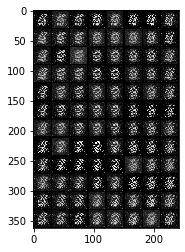

Epoch[2/30],d_loss:0.433647,g_loss:5.038605 D real: 0.884844,D fake: 0.181860
Epoch[2/30],d_loss:0.638390,g_loss:6.083572 D real: 0.884738,D fake: 0.191106
Epoch[2/30],d_loss:0.167421,g_loss:6.705490 D real: 0.954766,D fake: 0.061960
Epoch[2/30],d_loss:2.168264,g_loss:1.675847 D real: 0.513772,D fake: 0.433744


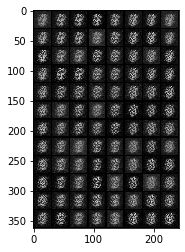

Epoch[3/30],d_loss:1.054588,g_loss:2.442757 D real: 0.698595,D fake: 0.306269
Epoch[3/30],d_loss:0.475007,g_loss:3.483624 D real: 0.917584,D fake: 0.236560
Epoch[3/30],d_loss:0.760063,g_loss:2.787044 D real: 0.818943,D fake: 0.271206
Epoch[3/30],d_loss:0.586468,g_loss:3.583406 D real: 0.815936,D fake: 0.158814


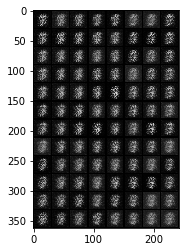

Epoch[4/30],d_loss:0.388248,g_loss:3.936401 D real: 0.895133,D fake: 0.149939
Epoch[4/30],d_loss:0.395271,g_loss:2.659646 D real: 0.863663,D fake: 0.147912
Epoch[4/30],d_loss:0.273956,g_loss:4.367184 D real: 0.900519,D fake: 0.082704
Epoch[4/30],d_loss:0.414237,g_loss:2.782102 D real: 0.904912,D fake: 0.205970


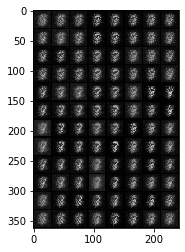

Epoch[5/30],d_loss:0.452256,g_loss:2.998312 D real: 0.863538,D fake: 0.181894
Epoch[5/30],d_loss:0.237375,g_loss:3.243546 D real: 0.923422,D fake: 0.110709
Epoch[5/30],d_loss:0.589414,g_loss:1.930158 D real: 0.862050,D fake: 0.230654
Epoch[5/30],d_loss:1.331510,g_loss:2.934892 D real: 0.632116,D fake: 0.089006


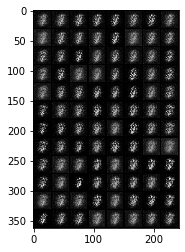

Epoch[6/30],d_loss:1.149461,g_loss:2.359738 D real: 0.740529,D fake: 0.338553
Epoch[6/30],d_loss:0.237628,g_loss:3.553314 D real: 0.905902,D fake: 0.071753
Epoch[6/30],d_loss:0.412569,g_loss:3.672798 D real: 0.887406,D fake: 0.154832
Epoch[6/30],d_loss:0.663600,g_loss:2.321170 D real: 0.791863,D fake: 0.202992


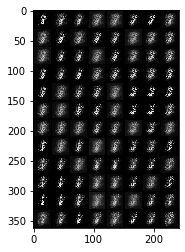

Epoch[7/30],d_loss:0.345604,g_loss:3.551184 D real: 0.892466,D fake: 0.125106
Epoch[7/30],d_loss:0.346952,g_loss:3.538055 D real: 0.886276,D fake: 0.111373
Epoch[7/30],d_loss:0.272425,g_loss:4.524256 D real: 0.928606,D fake: 0.093235
Epoch[7/30],d_loss:0.222331,g_loss:5.562067 D real: 0.915847,D fake: 0.060670


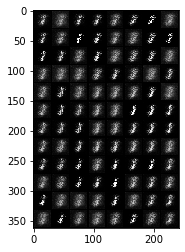

Epoch[8/30],d_loss:0.340055,g_loss:3.997797 D real: 0.887279,D fake: 0.114242
Epoch[8/30],d_loss:0.472483,g_loss:2.938266 D real: 0.876143,D fake: 0.175067
Epoch[8/30],d_loss:0.546169,g_loss:2.989126 D real: 0.809646,D fake: 0.169202
Epoch[8/30],d_loss:0.482285,g_loss:3.004570 D real: 0.808157,D fake: 0.138633


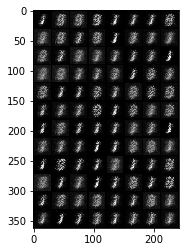

Epoch[9/30],d_loss:0.729548,g_loss:2.255488 D real: 0.773137,D fake: 0.203455
Epoch[9/30],d_loss:0.940594,g_loss:3.425597 D real: 0.664821,D fake: 0.132817
Epoch[9/30],d_loss:0.771804,g_loss:2.947273 D real: 0.727524,D fake: 0.195510
Epoch[9/30],d_loss:1.610780,g_loss:2.151683 D real: 0.567563,D fake: 0.397247


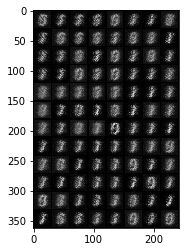

Epoch[10/30],d_loss:0.406587,g_loss:2.733093 D real: 0.870240,D fake: 0.163128
Epoch[10/30],d_loss:0.763672,g_loss:1.416928 D real: 0.769307,D fake: 0.297838
Epoch[10/30],d_loss:0.712235,g_loss:1.907624 D real: 0.780000,D fake: 0.266806
Epoch[10/30],d_loss:1.503274,g_loss:2.025550 D real: 0.632926,D fake: 0.337524


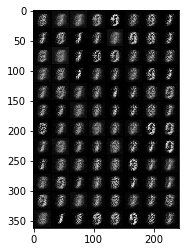

Epoch[11/30],d_loss:0.367238,g_loss:3.388161 D real: 0.869811,D fake: 0.134088
Epoch[11/30],d_loss:0.192328,g_loss:3.498774 D real: 0.959622,D fake: 0.117845
Epoch[11/30],d_loss:0.773096,g_loss:1.989740 D real: 0.829715,D fake: 0.298883
Epoch[11/30],d_loss:0.284981,g_loss:3.028699 D real: 0.929125,D fake: 0.103174


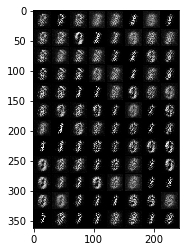

Epoch[12/30],d_loss:0.336744,g_loss:3.545757 D real: 0.883535,D fake: 0.092780
Epoch[12/30],d_loss:0.501328,g_loss:4.125819 D real: 0.801346,D fake: 0.023052
Epoch[12/30],d_loss:0.543894,g_loss:3.993391 D real: 0.861453,D fake: 0.144878
Epoch[12/30],d_loss:0.375342,g_loss:4.276828 D real: 0.950086,D fake: 0.194759


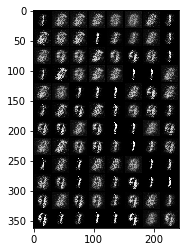

Epoch[13/30],d_loss:0.480467,g_loss:2.741108 D real: 0.856304,D fake: 0.147098
Epoch[13/30],d_loss:0.492263,g_loss:3.710307 D real: 0.845238,D fake: 0.081554
Epoch[13/30],d_loss:0.688640,g_loss:3.680372 D real: 0.889943,D fake: 0.219172
Epoch[13/30],d_loss:0.495064,g_loss:3.997471 D real: 0.855389,D fake: 0.138629


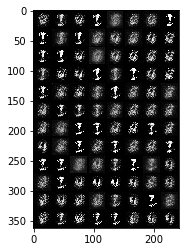

Epoch[14/30],d_loss:0.331565,g_loss:3.798694 D real: 0.900136,D fake: 0.096621
Epoch[14/30],d_loss:0.447471,g_loss:2.936434 D real: 0.896536,D fake: 0.199367
Epoch[14/30],d_loss:0.638106,g_loss:2.153866 D real: 0.835603,D fake: 0.169883
Epoch[14/30],d_loss:0.306519,g_loss:2.694786 D real: 0.902239,D fake: 0.109155


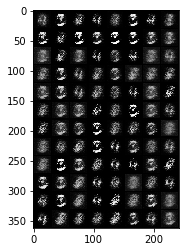

Epoch[15/30],d_loss:0.277412,g_loss:3.188002 D real: 0.905120,D fake: 0.080349
Epoch[15/30],d_loss:0.743544,g_loss:3.316989 D real: 0.814436,D fake: 0.207657
Epoch[15/30],d_loss:0.417028,g_loss:3.624238 D real: 0.920238,D fake: 0.183318
Epoch[15/30],d_loss:0.505552,g_loss:3.461228 D real: 0.829034,D fake: 0.099202


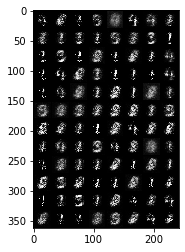

Epoch[16/30],d_loss:0.461593,g_loss:4.010633 D real: 0.801599,D fake: 0.036929
Epoch[16/30],d_loss:0.450066,g_loss:4.189664 D real: 0.914015,D fake: 0.143751
Epoch[16/30],d_loss:0.374177,g_loss:3.282496 D real: 0.841161,D fake: 0.064599
Epoch[16/30],d_loss:0.445857,g_loss:3.227270 D real: 0.858676,D fake: 0.112568


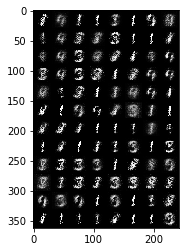

Epoch[17/30],d_loss:0.270552,g_loss:4.988573 D real: 0.895107,D fake: 0.030287
Epoch[17/30],d_loss:0.276327,g_loss:4.033206 D real: 0.906536,D fake: 0.080225
Epoch[17/30],d_loss:0.167190,g_loss:4.371116 D real: 0.913692,D fake: 0.029108
Epoch[17/30],d_loss:0.210073,g_loss:4.791264 D real: 0.967339,D fake: 0.132379


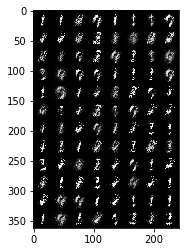

Epoch[18/30],d_loss:0.538558,g_loss:3.141151 D real: 0.857176,D fake: 0.148099
Epoch[18/30],d_loss:0.384448,g_loss:3.953408 D real: 0.854495,D fake: 0.077812
Epoch[18/30],d_loss:0.339591,g_loss:4.291167 D real: 0.910435,D fake: 0.140233
Epoch[18/30],d_loss:0.238715,g_loss:3.696721 D real: 0.967460,D fake: 0.130771


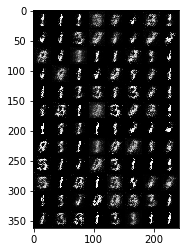

Epoch[19/30],d_loss:0.230296,g_loss:3.894856 D real: 0.920691,D fake: 0.068360
Epoch[19/30],d_loss:0.238832,g_loss:4.301108 D real: 0.947593,D fake: 0.102313
Epoch[19/30],d_loss:0.308098,g_loss:3.239233 D real: 0.924107,D fake: 0.141471
Epoch[19/30],d_loss:0.238370,g_loss:4.756897 D real: 0.931322,D fake: 0.094497


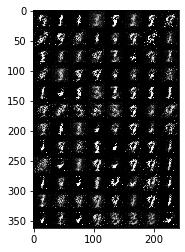

Epoch[20/30],d_loss:0.179469,g_loss:3.819180 D real: 0.958947,D fake: 0.099478
Epoch[20/30],d_loss:0.288147,g_loss:5.410666 D real: 0.934660,D fake: 0.101252
Epoch[20/30],d_loss:0.503005,g_loss:4.501482 D real: 0.864949,D fake: 0.131659
Epoch[20/30],d_loss:0.338077,g_loss:4.898996 D real: 0.927444,D fake: 0.126453


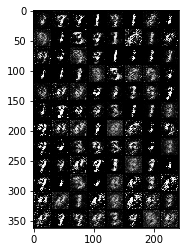

Epoch[21/30],d_loss:0.351522,g_loss:4.597315 D real: 0.939496,D fake: 0.170893
Epoch[21/30],d_loss:0.396405,g_loss:5.230978 D real: 0.878143,D fake: 0.078277
Epoch[21/30],d_loss:0.360260,g_loss:4.004977 D real: 0.939168,D fake: 0.087613
Epoch[21/30],d_loss:0.547408,g_loss:3.733640 D real: 0.825999,D fake: 0.117498


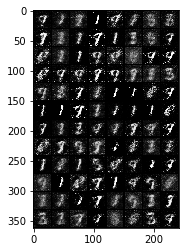

Epoch[22/30],d_loss:0.348867,g_loss:4.966527 D real: 0.914064,D fake: 0.083049
Epoch[22/30],d_loss:0.668264,g_loss:3.827786 D real: 0.849093,D fake: 0.136950
Epoch[22/30],d_loss:0.372814,g_loss:5.151472 D real: 0.886923,D fake: 0.077519
Epoch[22/30],d_loss:0.362794,g_loss:3.644188 D real: 0.898435,D fake: 0.108355


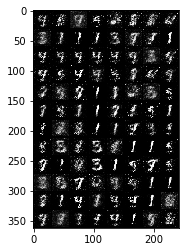

Epoch[23/30],d_loss:0.530562,g_loss:3.460862 D real: 0.850704,D fake: 0.115719
Epoch[23/30],d_loss:0.259531,g_loss:3.772251 D real: 0.908084,D fake: 0.064746
Epoch[23/30],d_loss:0.565210,g_loss:3.472859 D real: 0.846860,D fake: 0.122467
Epoch[23/30],d_loss:0.237853,g_loss:3.829079 D real: 0.924657,D fake: 0.086982


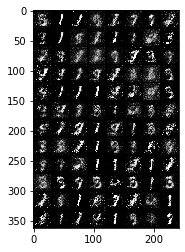

Epoch[24/30],d_loss:0.624704,g_loss:3.180967 D real: 0.832643,D fake: 0.132257
Epoch[24/30],d_loss:0.823973,g_loss:3.466218 D real: 0.713153,D fake: 0.074193
Epoch[24/30],d_loss:0.467636,g_loss:2.478066 D real: 0.894427,D fake: 0.177003
Epoch[24/30],d_loss:0.337231,g_loss:4.943167 D real: 0.838636,D fake: 0.046223


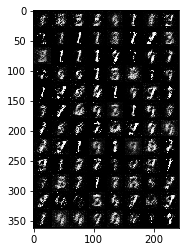

Epoch[25/30],d_loss:0.323724,g_loss:3.692479 D real: 0.910214,D fake: 0.129595
Epoch[25/30],d_loss:0.423746,g_loss:2.751079 D real: 0.887200,D fake: 0.164389
Epoch[25/30],d_loss:0.312505,g_loss:3.792128 D real: 0.862030,D fake: 0.083462
Epoch[25/30],d_loss:0.259353,g_loss:3.789022 D real: 0.893039,D fake: 0.069052


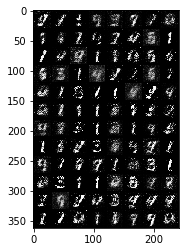

Epoch[26/30],d_loss:0.352322,g_loss:3.502444 D real: 0.907325,D fake: 0.153017
Epoch[26/30],d_loss:0.257223,g_loss:4.658461 D real: 0.929772,D fake: 0.097283
Epoch[26/30],d_loss:0.461046,g_loss:3.951472 D real: 0.858075,D fake: 0.159704
Epoch[26/30],d_loss:0.415797,g_loss:4.175618 D real: 0.829456,D fake: 0.075279


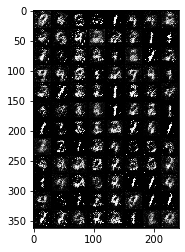

Epoch[27/30],d_loss:0.343381,g_loss:3.182337 D real: 0.892100,D fake: 0.122370
Epoch[27/30],d_loss:0.706900,g_loss:3.020474 D real: 0.802626,D fake: 0.077745
Epoch[27/30],d_loss:0.451384,g_loss:2.946151 D real: 0.813865,D fake: 0.074512
Epoch[27/30],d_loss:0.286222,g_loss:3.193921 D real: 0.937627,D fake: 0.153722


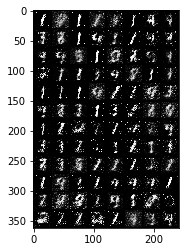

Epoch[28/30],d_loss:0.436262,g_loss:4.232100 D real: 0.886617,D fake: 0.116661
Epoch[28/30],d_loss:0.333267,g_loss:5.039131 D real: 0.910514,D fake: 0.104548
Epoch[28/30],d_loss:0.630316,g_loss:3.820894 D real: 0.806843,D fake: 0.116353
Epoch[28/30],d_loss:0.363011,g_loss:4.288714 D real: 0.893928,D fake: 0.130525


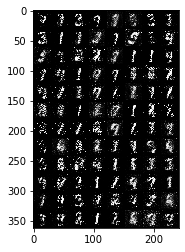

Epoch[29/30],d_loss:0.343284,g_loss:4.306208 D real: 0.912823,D fake: 0.104773
Epoch[29/30],d_loss:0.256166,g_loss:3.225729 D real: 0.941512,D fake: 0.114805
Epoch[29/30],d_loss:0.327167,g_loss:4.414890 D real: 0.893751,D fake: 0.077476
Epoch[29/30],d_loss:0.892668,g_loss:2.397290 D real: 0.901822,D fake: 0.358724


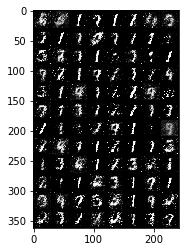

In [6]:
for epoch in range(num_epoch):  # 进行多个epoch的训练
    for i, (img, _) in enumerate(dataloader):
        num_img = img.size(0)
        # view()函数作用是将一个多行的Tensor,拼接成一行
        # 第一个参数是要拼接的tensor,第二个参数是-1
        # =============================训练判别器==================
        img = img.view(num_img, -1)  # 将图片展开为28*28=784
        real_img = Variable(img).cuda()  # 将tensor变成Variable放入计算图中
        real_label = Variable(torch.ones(num_img)).cuda()  # 定义真实的图片label为1
        fake_label = Variable(torch.zeros(num_img)).cuda()  # 定义假的图片的label为0
 
        # ########判别器训练train#####################
        # 分为两部分：1、真的图像判别为真；2、假的图像判别为假
        # 计算真实图片的损失
        real_out = D(real_img)  # 将真实图片放入判别器中
        d_loss_real = criterion(real_out, real_label)  # 得到真实图片的loss
        real_scores = real_out  # 得到真实图片的判别值，输出的值越接近1越好
        # 计算假的图片的损失
        z = Variable(torch.randn(num_img, z_dimension)).cuda()  # 随机生成一些噪声
        fake_img = G(z).detach()  # 随机噪声放入生成网络中，生成一张假的图片。 # 避免梯度传到G，因为G不用更新, detach分离
        fake_out = D(fake_img)  # 判别器判断假的图片，
        d_loss_fake = criterion(fake_out, fake_label)  # 得到假的图片的loss
        fake_scores = fake_out  # 得到假图片的判别值，对于判别器来说，假图片的损失越接近0越好
        # 损失函数和优化
        d_loss = d_loss_real + d_loss_fake  # 损失包括判真损失和判假损失
        d_optimizer.zero_grad()  # 在反向传播之前，先将梯度归0
        d_loss.backward()  # 将误差反向传播
        d_optimizer.step()  # 更新参数
 
        # ==================训练生成器============================
        # ###############################生成网络的训练###############################
        # 原理：目的是希望生成的假的图片被判别器判断为真的图片，
        # 在此过程中，将判别器固定，将假的图片传入判别器的结果与真实的label对应，
        # 反向传播更新的参数是生成网络里面的参数，
        # 这样可以通过更新生成网络里面的参数，来训练网络，使得生成的图片让判别器以为是真的
        # 这样就达到了对抗的目的
        # 计算假的图片的损失
        z = Variable(torch.randn(num_img, z_dimension)).cuda()  # 得到随机噪声
        fake_img = G(z)  # 随机噪声输入到生成器中，得到一副假的图片
        output = D(fake_img)  # 经过判别器得到的结果
        g_loss = criterion(output, real_label)  # 得到的假的图片与真实的图片的label的loss
        # bp and optimize
        g_optimizer.zero_grad()  # 梯度归0
        g_loss.backward()  # 进行反向传播
        g_optimizer.step()  # .step()一般用在反向传播后面,用于更新生成网络的参数
 
        # 打印中间的损失
        if (i + 1) % 100 == 0:
            print('Epoch[{}/{}],d_loss:{:.6f},g_loss:{:.6f} '
                  'D real: {:.6f},D fake: {:.6f}'.format(
                epoch, num_epoch, d_loss.data.item(), g_loss.data.item(),
                real_scores.data.mean(), fake_scores.data.mean()  # 打印的是真实图片的损失均值
            ))
        if epoch == 0:
            real_images = to_img(real_img.cpu().data)
            save_image(real_images, './img2/real_images.png')
    if epoch == 0:
        showimg('./img2/real_images.png')
    fake_images = to_img(fake_img.cpu().data)
    save_image(fake_images, './img2/fake_images-{}.png'.format(epoch + 1))
    showimg('./img2/fake_images-{}.png'.format(epoch + 1))

# 保存模型
#torch.save(G.state_dict(), './generator.pth')
#torch.save(D.state_dict(), './discriminator.pth')